# Statistics. Assignment 3. Alexandr Grichshenko.

## Algorithm summary:

1. Access top 30 most populated cities in Russia and calculate their distances
2. Initialize initial state $x$, temperature $T$ and cooling rate $\alpha$.
3. Create neighbour to the current solution $x^{'}$ by swapping two cities in the current path
4. Move to the neighbour solution if the acceptance ratio is less than the randomly drawn number from the uniform distribution
5. Cool down the system by reducing $T$

The algorithm stops when the critical value of $T$ is reached.

In [25]:
# accessing the data
import pandas as pd
df = pd.read_csv('city.csv')

In [26]:
import numpy as np
from geopy.distance import geodesic

df = df.sort_values(by='population', ascending=False)
df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221


In [27]:
# getting top 30 cities and calculating the distances in kilometers
top_cities = df[:30].copy()

lattitudes = list(top_cities['geo_lat'])
longitudes = list(top_cities['geo_lon'])
city_names = list(top_cities['address'])

distances = np.zeros((30, 30))
for i in range(30):
  for j in range(30):
    distances[i][j] = geodesic((lattitudes[i], longitudes[i]), 
                               (lattitudes[j], longitudes[j])).km

In [28]:
# function to calculate the cost of a particular path
def cost(solution):
  current = 0
  for i in range(1, len(solution)):
    city1 = solution[i-1]
    city2 = solution[i]
    current += distances[city1][city2]
    if i==len(solution)-1:
      current += distances[i][0]
  return current

In [35]:
import math

# class implementing SA
class SA:
  def __init__(self, cooling_rate):
    self.rate = cooling_rate
    self.x = np.random.permutation(30)
    self.temperatures = [] # saving all temperatures
    self.distances = [] # saving all costs
    self.results = [] # saving all paths

  def acceptance_ratio(self, x_t, x_prime, temp):
    return math.exp(- (1/temp) * (cost(x_prime) - cost(x_t)))

  def g(self, x):
    x_prime = x.copy()
    sample1, sample2 = np.random.choice(x_prime, 2, replace=False)
    x_prime[sample1], x_prime[sample2] = x_prime[sample2], x_prime[sample1]
    return x_prime

  def run(self):

    temperature = 15000

    self.temperatures.append(temperature)
    self.distances.append(cost(self.x))
    self.results.append(self.x)

    while temperature > 100:
      x_prime = g(self.x)
      ratio = self.acceptance_ratio(self.x, x_prime, temperature)

      if np.random.uniform() <= ratio:
        self.x = x_prime
      
      temperature *= self.rate
      self.results.append(self.x)
      self.distances.append(cost(self.x))
      self.temperatures.append(temperature)

For this task I have used the following values for three types of cooling:


*   Fast cooling: $\alpha=0.5$
*   Medium cooling: $\alpha=0.75$
*   Slow cooling: $\alpha=0.9$

The initial temperature was set to $T=15000$ and the final value $T_{final}=100$. As shown in the plot below, the best results (lowest cost) was achieved by slow cooling, while the medium cooling performed the worst. Both slow and fast cooling showed dramatic improvements in the latter stages of cooling, while medium cooling remained on a similar level of performance throughout the entire process.





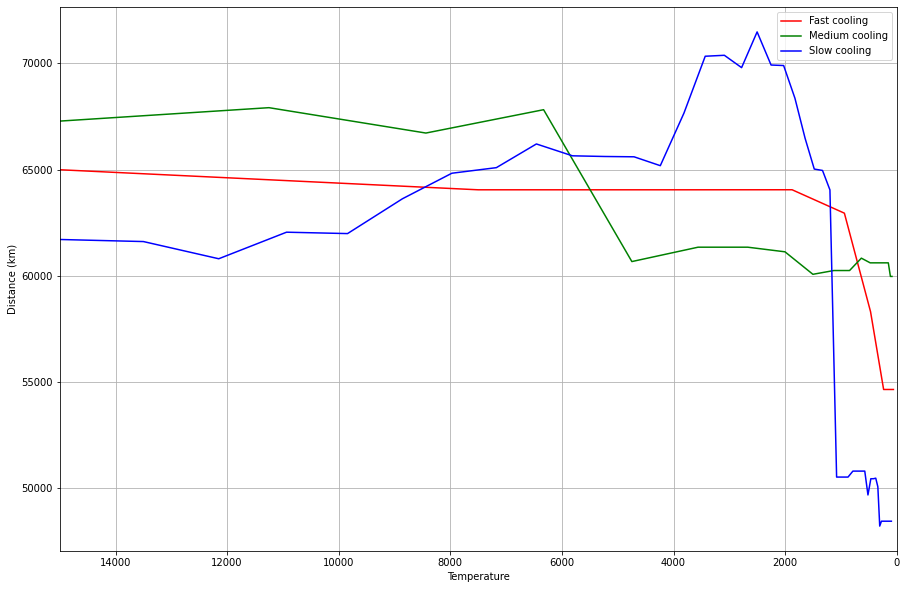

In [40]:
# plotting the results for three different cooling rates

from matplotlib import pyplot as plt

fast = SA(0.5)
fast.run()

medium = SA(0.75)
medium.run()

slow = SA(0.9)
slow.run()

# plot the difference
plt.figure(figsize=(15, 10))
plt.plot(fast.temperatures, fast.distances, label='Fast cooling', color='red')
plt.plot(medium.temperatures, medium.distances, label='Medium cooling', color='green')
plt.plot(slow.temperatures, slow.distances, label='Slow cooling', color='blue')
plt.grid()
plt.xlim(15000, 0)
plt.ylabel('Distance (km)')
plt.xlabel('Temperature')
plt.legend()
plt.show()

P.S. No visualisation of cities, due to poor time management :(